In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition

100% 1.98G/1.98G [01:28<00:00, 23.4MB/s]
100% 1.98G/1.98G [01:28<00:00, 24.1MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/fruit-and-vegetable-image-recognition.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [ ]:
train_datagen = tf.keras.preprocessing.image_dataset_from_directory(
                                                '/content/train',
                                                labels="inferred",
                                                label_mode="int",
                                                color_mode="rgb",
                                                batch_size=32,
                                                image_size=(256, 256))
test_datagen = tf.keras.preprocessing.image_dataset_from_directory(
                                                '/content/test',
                                                labels="inferred",
                                                label_mode="int",
                                                color_mode="rgb",
                                                batch_size=32,
                                                image_size=(256, 256))

Found 3115 files belonging to 36 classes.
Found 359 files belonging to 36 classes.


In [ ]:
def image_processor(image,label):
  image = tf.cast(image/255.,tf.float32)
  return image,label

train_datagen = train_datagen.map(image_processor)
test_datagen = test_datagen.map(image_processor)

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(36,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

In [ ]:
history = model.fit(train_datagen,epochs=15,validation_data=test_datagen,batch_size=32)

Epoch 1/15
98/98 [==============================] - 65s 620ms/step - loss: 0.9887 - accuracy: 0.7085 - val_loss: 0.6340 - val_accuracy: 0.8607
Epoch 2/15
98/98 [==============================] - 70s 653ms/step - loss: 0.6147 - accuracy: 0.8209 - val_loss: 0.6029 - val_accuracy: 0.8886
Epoch 3/15
98/98 [==============================] - 67s 639ms/step - loss: 0.4207 - accuracy: 0.8796 - val_loss: 0.5731 - val_accuracy: 0.9081
Epoch 4/15
98/98 [==============================] - 66s 622ms/step - loss: 0.3008 - accuracy: 0.9169 - val_loss: 0.5024 - val_accuracy: 0.9220
Epoch 5/15
98/98 [==============================] - 68s 638ms/step - loss: 0.2740 - accuracy: 0.9316 - val_loss: 0.4280 - val_accuracy: 0.9499
Epoch 6/15
98/98 [==============================] - 67s 642ms/step - loss: 0.1783 - accuracy: 0.9499 - val_loss: 0.4829 - val_accuracy: 0.9331
Epoch 7/15
98/98 [==============================] - 67s 636ms/step - loss: 0.1465 - accuracy: 0.9621 - val_loss: 0.3531 - val_accuracy: 0.9443

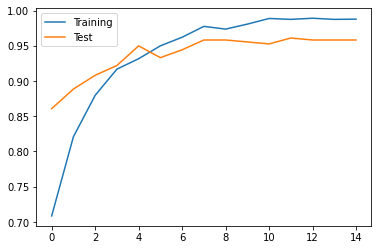

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label="Training")
plt.plot(history.history['val_accuracy'], label="Test")
plt.legend()
plt.show()

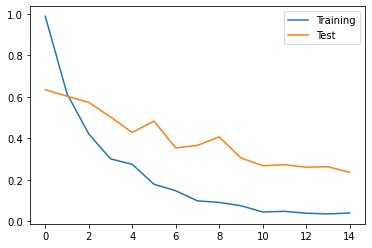

In [ ]:
plt.plot(history.history['loss'],label="Training")
plt.plot(history.history['val_loss'], label="Test")
plt.legend()
plt.show()